<a href="https://colab.research.google.com/github/oneway-net/scientific-python/blob/main/Lecture_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 8 - PyTorch

This will be the final lecture, today we will first have a brief introduction of deep learning, then we will look at some basics of using PyTorch to implement some simple models in deep learning.

1. Homework due today
2. No OH today

# Basic Section (Start)
What is Neural Network:
1. [My recommended youtube video with great visual helpers](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=4)
2.  [Previous Years Instructor's Recording](https://stanford-pilot.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c79271d9-3694-49d3-8f93-afb10161e47e)
# Basic Section (End)

## Deep Learning Libraries

There are many deep learning libraries available, the most common ones for python are

- TensorFlow, Keras
- PyTorch

Working with tensorflow requires going into lot of details of the contruction of the computation graph, whereas Keras is a higher level interface for tensorflow. Tensorflow is very popular in the industry and good for production code.

PyTorch can be used as low level interface, but is much more user-friendly than tensorflow, but it also has a higher level interface. Pytorch is more popular in the research community.

## Main features that any deep learning library should provide

No matter what library or language you use, the main features provided by a deep learning library are 
1. Use the GPU to speed up computation 
2. Ability to do automatic differentiation
3. Useful library functions for common architectures and optimization algorithms

### PyTorch
We will look at all of the above in pytorch.
The best way to think about pytorch is that its numpy + GPU + autograd.

You can install it with

```conda install pytorch```.

Alternatively (and recommended), run this notebook in Google Colab-- it provides an environment with all of the PyTorch dependencies plus a GPU free of charge.

In [ ]:
import torch
import numpy as np

The equivalent object to numpy arrays in pytorch are called tensors, but they are just multidimensional arrays.

In [ ]:
torch.tensor([2,3,4,5])

tensor([2, 3, 4, 5])

In [ ]:
torch.zeros((5,5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
x = torch.ones((5,5))
print(type(x))
x

<class 'torch.Tensor'>


tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [ ]:
2*x + 5

tensor([[7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.]])

In [ ]:
torch.randn(5,5)

tensor([[ 2.0389,  1.9222, -0.5508,  0.2756, -0.9061],
        [-0.3364,  0.6881, -0.0981, -0.5064,  0.0598],
        [ 0.2379,  0.6156,  0.2822,  1.9747,  1.4114],
        [-2.4697,  0.7823,  1.2714, -0.9148, -0.4484],
        [-0.5442, -1.9438,  1.1559,  0.8419,  0.7047]])

In [ ]:
x = torch.rand(25)
x

tensor([0.6136, 0.2190, 0.5721, 0.6396, 0.6953, 0.4541, 0.3827, 0.0567, 0.6638,
        0.7713, 0.1073, 0.1899, 0.6161, 0.4600, 0.9465, 0.1657, 0.6050, 0.0697,
        0.7622, 0.8850, 0.6074, 0.1173, 0.3420, 0.9066, 0.6158])

In [ ]:
x=x.reshape(-1,5)
x

tensor([[0.6136, 0.2190, 0.5721, 0.6396, 0.6953],
        [0.4541, 0.3827, 0.0567, 0.6638, 0.7713],
        [0.1073, 0.1899, 0.6161, 0.4600, 0.9465],
        [0.1657, 0.6050, 0.0697, 0.7622, 0.8850],
        [0.6074, 0.1173, 0.3420, 0.9066, 0.6158]])

In [ ]:
x.shape

torch.Size([5, 5])

In [ ]:
print(torch.arange(10))
print(torch.eye(5))
print(torch.linspace(0,1,10))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])
tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])


Some functions are a bit different

In [ ]:
A = np.random.rand(5,5)
x = np.ones((5,1))
A@x

array([[2.27711895],
       [2.09251975],
       [3.38718905],
       [2.33932473],
       [3.32822249]])

In [ ]:
A_ = torch.rand((5,5))
x_ = torch.rand(5,1)
A_@x_

tensor([[1.7982],
        [1.2171],
        [1.4513],
        [0.8561],
        [1.0434]])

In [ ]:
A = torch.ones((5,5)) 
x = torch.ones(5,1)
A@x

tensor([[5.],
        [5.],
        [5.],
        [5.],
        [5.]])

In [ ]:
?np.ones

In [ ]:
?torch.ones

You can convert tensors to a numpy array that shares its memory with the pytorch tensor -> to use more library that are compatible to numpy but not pytorch

In [ ]:
x = torch.ones(5,5)
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [ ]:
xn = x.numpy()
print(type(xn))
xn

<class 'numpy.ndarray'>


array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [ ]:
# Changes in Numpy will cause changes in Tensor
xn[4,2]=10
xn

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., 10.,  1.,  1.]], dtype=float32)

In [ ]:
x

tensor([[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1., 10.,  1.,  1.]])

### Using the GPU

The GPU (Graphical Processing Unit) is a separate processing unit that is specialized to handle bulk computations required for rendering high quality graphics. It mainly consists of a large number of processor cores that are individually very slow, but because of their sheer number (around 2000) they can churn through computations very quickly. 

In [ ]:
import torch
"""
CUDA is a parallel computing platform 
and application programming interface 
that allows software to use certain types 
of graphics processing units for general purpose processing
""";
#CUDA -> Recommend CME213 (C++)
torch.cuda.is_available()

True

Installing the GPU drivers and the CUDA toolkit can be quite messy, so if you just want to experiment with GPUs and deep learning libraries, you can use [Google colaboratory](https://colab.research.google.com/)

In [ ]:
gpu = torch.device("cuda")
cpu = torch.device("cpu")

In [ ]:
A = torch.rand(100,100)
B = torch.rand(100,100)

In [ ]:
A@B

tensor([[25.9445, 23.3451, 23.2453,  ..., 23.6876, 23.3642, 21.0127],
        [29.1864, 29.7169, 27.8055,  ..., 29.9012, 26.9726, 24.5918],
        [26.6460, 26.9354, 25.1543,  ..., 26.0435, 25.1616, 22.4802],
        ...,
        [29.2716, 27.0511, 27.1193,  ..., 28.7066, 26.1744, 24.4956],
        [29.4815, 27.5012, 26.7596,  ..., 29.7794, 28.2612, 25.2685],
        [26.5447, 23.0760, 24.2269,  ..., 26.3211, 23.7328, 21.0399]])

In [ ]:
A_gpu = A.to(gpu)
B_gpu = B.to(gpu)

In [ ]:
A_gpu@B_gpu

tensor([[25.9445, 23.3451, 23.2453,  ..., 23.6876, 23.3642, 21.0127],
        [29.1864, 29.7169, 27.8055,  ..., 29.9012, 26.9726, 24.5918],
        [26.6460, 26.9354, 25.1543,  ..., 26.0435, 25.1616, 22.4802],
        ...,
        [29.2716, 27.0511, 27.1193,  ..., 28.7066, 26.1744, 24.4956],
        [29.4815, 27.5012, 26.7596,  ..., 29.7794, 28.2612, 25.2685],
        [26.5447, 23.0760, 24.2269,  ..., 26.3211, 23.7328, 21.0399]],
       device='cuda:0')

In [ ]:
A@B_gpu #this won't work!

RuntimeError: ignored

In [ ]:
C_gpu = A_gpu@B_gpu
C = C_gpu.to(cpu)
C

tensor([[25.9445, 23.3451, 23.2453,  ..., 23.6876, 23.3642, 21.0127],
        [29.1864, 29.7169, 27.8055,  ..., 29.9012, 26.9726, 24.5918],
        [26.6460, 26.9354, 25.1543,  ..., 26.0435, 25.1616, 22.4802],
        ...,
        [29.2716, 27.0511, 27.1193,  ..., 28.7066, 26.1744, 24.4956],
        [29.4815, 27.5012, 26.7596,  ..., 29.7794, 28.2612, 25.2685],
        [26.5447, 23.0760, 24.2269,  ..., 26.3211, 23.7328, 21.0399]])

## Speedup from GPU
`%%timeit` is a Jupyter Notebook magic command that is used to measure the execution time of a Python code snippet. When you add `%%timeit` at the beginning of a cell in a Jupyter Notebook, it will run the code in the cell multiple times and measure the average execution time.

In [ ]:
%%timeit
A = torch.rand(3000,3000)
B = torch.rand(3000,3000)
for i in range(5):
    B=torch.mm(A,B)

3.87 s ± 486 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
A = torch.rand(3000,3000, device = gpu)
B = torch.rand(3000,3000, device = gpu)
for i in range(5):
    B=torch.mm(A,B)

68 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Automatic Differentiation

PyTorch uses dynamic computation graphs to compute the gradients of the parameters.

In [ ]:
x = torch.tensor([2.0])
w = torch.tensor([5.0], requires_grad = True)
b = torch.tensor([2.0], requires_grad = True)

In [ ]:
y = w*x + b #12 = 5*2 + 2
y

tensor([12.], grad_fn=<AddBackward0>)

Define an error for your function

In [ ]:
loss = torch.norm( y - 13)
loss

tensor(1., grad_fn=<LinalgVectorNormBackward0>)

In [ ]:
w.grad

Calling `x.backward()` on any tensor forces pytorch to compute all the gradients of the tensors used to compute `x` which had the `requires_grad` flag set to `True`. The computed gradient will be stored in the `.grad` property of the tensors

In [ ]:
loss.backward()

In [ ]:
w.grad

tensor([-2.])

In [ ]:
b.grad

tensor([-1.])

we can tell PyTorch to skip the gradient calculations, which can help to reduce the memory usage and speed up computations.

In [ ]:
# It will reduce memory consumption for computations 
# that would otherwise have requires_grad=True
with torch.no_grad(): #when we update w and b, do not update gradients
    w -= 0.01 * w.grad
    b -= 0.3 * b.grad

In [ ]:
w,b

(tensor([5.0200], requires_grad=True), tensor([2.3000], requires_grad=True))

In [ ]:
w.grad, b.grad

(tensor([-2.]), tensor([-1.]))

In [ ]:
# the gradients will accumulate and lead to incorrect updates and slower convergence.
w.grad.zero_()
b.grad.zero_()

w.grad, b.grad

(tensor([0.]), tensor([0.]))

In [ ]:
y = w*x + b

In [ ]:
y

tensor([12.3400], grad_fn=<AddBackward0>)

In [ ]:
loss = torch.norm( y - 13)
loss

tensor(0.6600, grad_fn=<LinalgVectorNormBackward0>)

In [ ]:
loss.backward()
w.grad, b.grad

(tensor([-2.]), tensor([-1.]))

### Making it more compact

In [ ]:
def model_fn(x,w,b):
    return w*x + b

In [ ]:
def loss_fn(y,yt):
    return torch.norm(y-yt)

In [ ]:
w = torch.tensor([5.0], requires_grad = True)
b = torch.tensor([2.0], requires_grad = True)

In [ ]:
x = torch.tensor([2.0])
yt = torch.tensor([13.0])

In [ ]:
y = model_fn(x,w,b)
loss = loss_fn(y,yt)
loss.backward()
with torch.no_grad():
    w -= 0.05 * w.grad
    b -= 0.05 * b.grad
w.grad.zero_()
b.grad.zero_()

print( f" w = {w}\n b = {b}\n y = {y}\n loss = {loss}")
#note that 'loss' indicates the loss for the previous m,c values

 w = tensor([5.5000], requires_grad=True)
 b = tensor([2.2500], requires_grad=True)
 y = tensor([13.0000], grad_fn=<AddBackward0>)
 loss = 9.5367431640625e-07


### Slightly more complicated problem

1. Forward propagation to get predicted yhat
2. Get the loss by loss_fun(y, yhat)
3. Backward propagation to get the gradient
4. Update parameters
5. Repeat 1 ~ 4 until convergence

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def model_fn(x,w,b):
    return w@x + b

In [ ]:
def loss_fn(y,yt):
    return torch.norm(y-yt)

In [ ]:
w = torch.rand((5,5), requires_grad = True)
b = torch.ones((5,1), requires_grad = True)

In [ ]:
x = torch.randn(5,100)
yt = torch.randn(1,100)
losses = []

loss = 42.68125915527344
loss = 38.598995208740234
loss = 34.91118240356445
loss = 31.68004035949707
loss = 28.95591163635254
loss = 26.76153564453125
loss = 25.078950881958008
loss = 23.84857177734375
loss = 22.98369026184082
loss = 22.392330169677734
loss = 21.9942684173584
loss = 21.727962493896484
loss = 21.54981231689453
loss = 21.43026351928711
loss = 21.349693298339844
loss = 21.29514503479004
loss = 21.2580623626709
loss = 21.232763290405273
loss = 21.21544647216797
loss = 21.203561782836914
loss = 21.195388793945312
loss = 21.18975067138672
loss = 21.185855865478516
loss = 21.183162689208984
loss = 21.181293487548828
loss = 21.179996490478516
loss = 21.179094314575195
loss = 21.178466796875
loss = 21.178028106689453
loss = 21.177722930908203
loss = 21.177507400512695
loss = 21.177358627319336
loss = 21.17725372314453
loss = 21.17717742919922
loss = 21.177125930786133
loss = 21.17708969116211
loss = 21.17706298828125
loss = 21.177047729492188
loss = 21.177032470703125
loss = 21

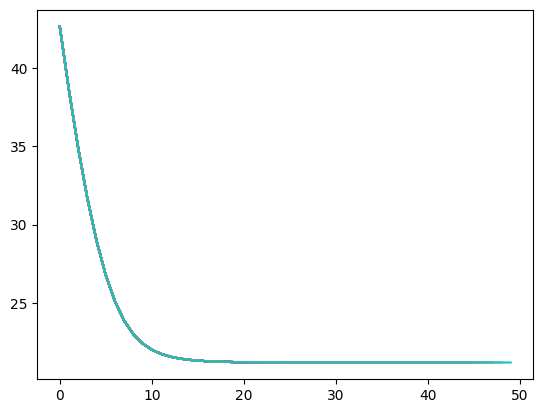

In [ ]:
for i in range(50):
  # 1. Forward
  y = model_fn(x,w,b)
  # 2. Get loss
  loss = loss_fn(y,yt)
  # 3. backward
  loss.backward()
  # 4. Update
  with torch.no_grad():
      w -= 0.05 * w.grad
      b -= 0.05 * b.grad
  w.grad.zero_()
  b.grad.zero_()

  losses+=[loss.item()]
  print( f"loss = {loss}")
  plt.plot(losses);

## Using Library functions

In [ ]:
model = torch.nn.Sequential( 
    # create layer of sequence
    # F(WX + B)
    # First layer: ReLU(WX + B)
      # ReLU is important because it is doing some non-linear tranformation 
    torch.nn.Linear(5, 5),
    torch.nn.ReLU(),

    # Output layer
    torch.nn.Linear(5, 1),
)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2748, -0.2685, -0.0039,  0.1949,  0.3134],
         [-0.1417,  0.2113, -0.4093, -0.3378, -0.0309],
         [ 0.1067, -0.2863,  0.0161,  0.2390, -0.2557],
         [-0.0025,  0.4096, -0.1420,  0.2324, -0.4004],
         [ 0.3609,  0.1004, -0.3751, -0.0444, -0.1293]], requires_grad=True),
 Parameter containing:
 tensor([-0.1005,  0.1310, -0.1135,  0.3248,  0.0254], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1023, -0.4273, -0.1353, -0.1554,  0.4187]], requires_grad=True),
 Parameter containing:
 tensor([0.3443], requires_grad=True)]

In [ ]:
#mean square loss → MSE = (1/n) * sum((y_pred - y_true)^2)
loss_fn = torch.nn.MSELoss(reduction='sum')

In [ ]:
x = torch.randn(100,5)
yt = torch.randn(100,1)
losses = []

Using the optim package

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

`optimizer.step()` is used to update the model parameters based on the gradients computed during backpropagation. During training, the optimizer computes the gradients of the loss function with respect to the model parameters
  
`optimizer.zero_grad()` is used to set the gradients of all the model parameters to zero before computing the gradients for the next batch of data. If we don't zero out the gradients before computing the gradients for the next batch, the gradients will accumulate, leading to incorrect updates and slower convergence.

loss = 109.11067199707031
loss = 103.79290771484375
loss = 100.48275756835938
loss = 98.2297134399414
loss = 96.45237731933594
loss = 95.04127502441406
loss = 93.97252655029297
loss = 93.10059356689453
loss = 92.59867858886719
loss = 92.08340454101562
loss = 91.49703979492188
loss = 91.00679016113281
loss = 90.61006927490234
loss = 90.32628631591797
loss = 90.17387390136719
loss = 90.01512145996094
loss = 89.75697326660156
loss = 89.45178985595703
loss = 89.17681121826172
loss = 88.9458999633789
loss = 88.77508544921875
loss = 88.59017181396484
loss = 88.42076873779297
loss = 88.30952453613281
loss = 88.15856170654297
loss = 87.99110412597656
loss = 87.78230285644531
loss = 87.7010726928711
loss = 87.61630249023438
loss = 87.49898529052734
loss = 87.36100769042969
loss = 87.26129150390625
loss = 87.2113037109375
loss = 87.13215637207031
loss = 87.03333282470703
loss = 86.95282745361328
loss = 86.86701965332031
loss = 86.77272033691406
loss = 86.68834686279297
loss = 86.62247467041016
l

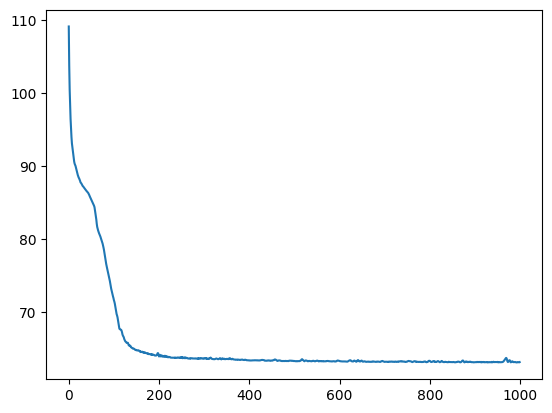

In [ ]:
for i in range(1000):
    y = model(x)
    loss = loss_fn(y,yt)
    loss.backward()

    #make the parameter to take a step -> update the parameter
    optimizer.step()
    optimizer.zero_grad()

    losses+=[loss.item()]
    print( f"loss = {loss}")
plt.plot(losses);

## MNIST Example

In [ ]:
from torchvision.datasets import MNIST

In [ ]:
data = MNIST(".",download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 83862746.30it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 47860803.57it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28057265.13it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3066236.72it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
len(data)

60000

In [ ]:
import numpy as np
img,y = data[np.random.randint(1,60000)]
print(y)
img

0


In [ ]:
print(data.train_data[2].shape)

torch.Size([28, 28])


In [ ]:
print(data.train_labels[2])

tensor(4)


### MNIST Training

In [ ]:
model = torch.nn.Sequential( # 28*28 = 784
    torch.nn.Linear(784,  100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 10),
    torch.nn.LogSoftmax(dim=1)
)

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
sample = np.random.choice(range(len(data.train_data)),1000)
x = data.train_data[sample].reshape(1000,-1).float()/255
yt = data.train_labels[sample]

In [ ]:
x.shape,yt.shape

(torch.Size([1000, 784]), torch.Size([1000]))

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)
losses = []

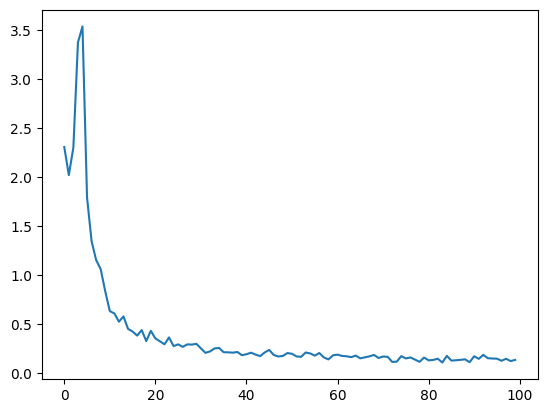

In [ ]:
for i in range(100):
    
    sample = np.random.choice(range(len(data.train_data)),1000)
    x = data.train_data[sample].reshape(1000,-1).float()/255
    yt = data.train_labels[sample]
    
    y = model(x)

    # input (Tensor) – Predicted unnormalized logits
    # target (Tensor) – Ground truth class indices or class probabilities
    loss = loss_fn(y,yt)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    losses+=[loss.item()]
    #print( f"loss = {loss}")
plt.plot(losses);

In [ ]:
x_test = data.train_data[-1000:].reshape(1000,-1).float()/255
y_test = data.train_labels[-1000:]

In [ ]:
with torch.no_grad():
    y_pred = model(x_test)

In [ ]:
y_pred[0]

tensor([ -5.6633,  -9.4235,  -6.2136,  -9.4794,  -3.8566,  -6.2634,  -0.0299,
         -8.7633,  -7.3443, -11.3133])

In [ ]:
print("Accuracy = ", (y_pred.argmax(dim=1) == y_test).sum().float().item()/1000.0)

Accuracy =  0.968


## Course Conclusion

1. By now you should have a sufficient introduction to the various ways one can use python for scientific computing. The best way to learn more is to start using python for whatever project you are working on. Only practice will make you comfortable with using python.   

Recommended Project Source: kaggle  

Recommended ML/DL Courses: CS229, 230, 231N, 224 series, 238, 246  

2. I appreciate your time to submit the course feedback, which means a lot to me and improvement for this course in the future  
 
